# Comprehensiveness

In [46]:
import json

f = open('/home/abpal/WorkFiles/Results/Ablation_Final/ablation_result_100.json')
data = json.load(f)

# Example: Calculate overall statistics for each topic
overall_topic_statistics = {}
for topic, words in data.items():
    total_changes = sum(word_data['total_changes'] for word_data in words.values())
    total_same = sum(word_data['total_same'] for word_data in words.values())
    overall_topic_statistics[topic] = {'total_changes': total_changes, 'total_same': total_same}

# Print overall topic statistics
print(json.dumps(overall_topic_statistics, indent=2))

{
  "Topic_0": {
    "total_changes": 18548,
    "total_same": 94592
  },
  "Topic_1": {
    "total_changes": 20332,
    "total_same": 92808
  },
  "Topic_2": {
    "total_changes": 18513,
    "total_same": 94627
  },
  "Topic_3": {
    "total_changes": 19008,
    "total_same": 94132
  },
  "Topic_4": {
    "total_changes": 17931,
    "total_same": 95209
  },
  "Topic_5": {
    "total_changes": 17646,
    "total_same": 95494
  },
  "Topic_6": {
    "total_changes": 15365,
    "total_same": 97775
  },
  "Topic_7": {
    "total_changes": 20110,
    "total_same": 93030
  },
  "Topic_8": {
    "total_changes": 20123,
    "total_same": 93017
  },
  "Topic_9": {
    "total_changes": 17377,
    "total_same": 95763
  },
  "Topic_10": {
    "total_changes": 16804,
    "total_same": 96336
  },
  "Topic_11": {
    "total_changes": 15961,
    "total_same": 97179
  },
  "Topic_12": {
    "total_changes": 17158,
    "total_same": 95982
  },
  "Topic_13": {
    "total_changes": 19257,
    "total_same

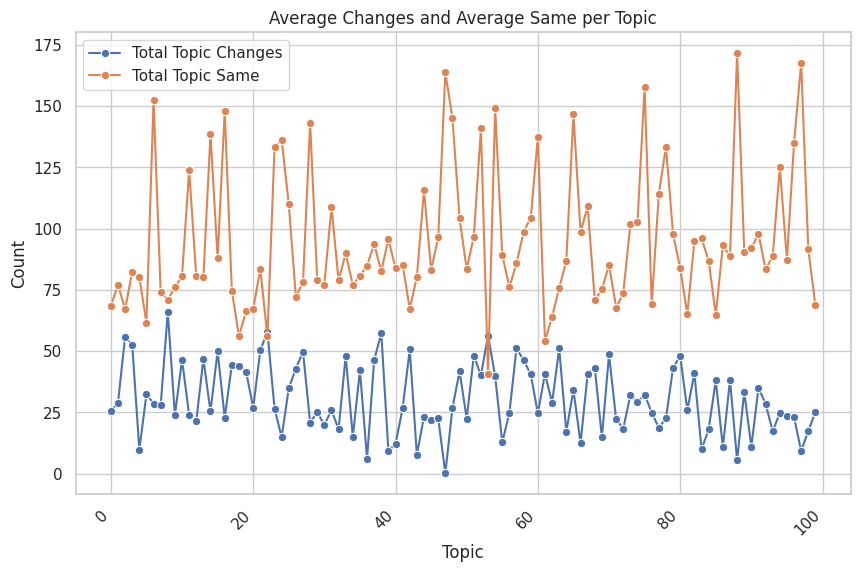

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_topic_statistics(data):
    # Extract data for plotting
    topics = list(int(i.split("_")[-1]) for i in data.keys())
    total_changes_values = [sum(word_data['topic_change']/len(words.values()) for word_data in words.values()) for words in data.values()]
    total_same_values = [sum(word_data['topic_same']/len(words.values()) for word_data in words.values()) for words in data.values()]

    # Create a DataFrame for Seaborn
    import pandas as pd
    df = pd.DataFrame({'Topic': topics, 'Total Changes': total_changes_values, 'Total Same': total_same_values})
    
    # Set the plotting style    
    sns.set(style="whitegrid")  
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the total changes
    sns.lineplot(x='Topic', y='Total Changes', data=df, marker='o', label='Total Topic Changes', ax=ax)

    # Plot the total same
    sns.lineplot(x='Topic', y='Total Same', data=df, marker='o', label='Total Topic Same', ax=ax)

    # Set plot labels and title
    ax.set(xlabel='Topic', ylabel='Count', title='Average Changes and Average Same per Topic')

    # Display the legend
    ax.legend()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

# Assuming your data is stored in a variable called 'your_data'
plot_topic_statistics(data)


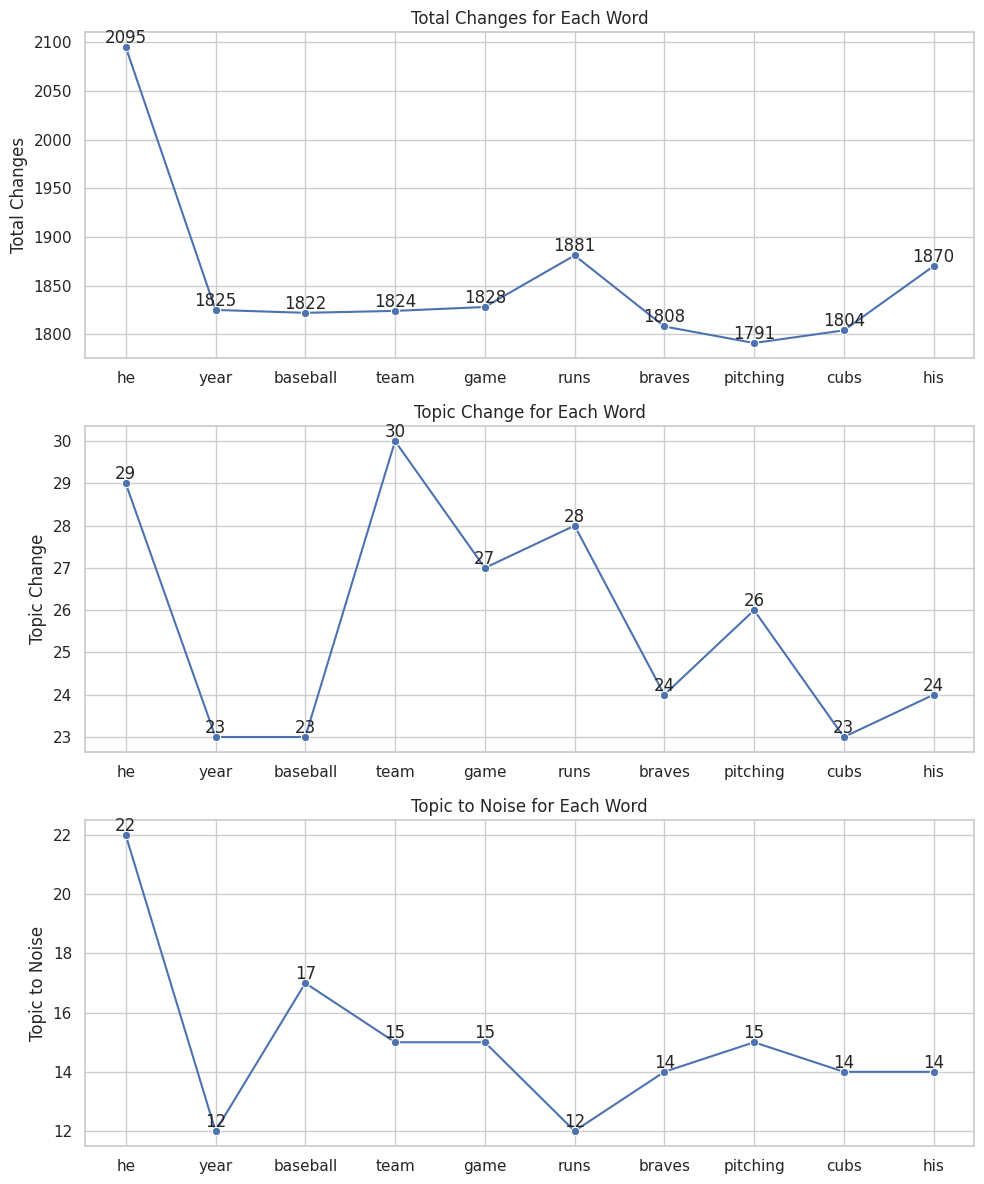

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_topic_statistics(data, topic_number):
    # Extract data for the specified topic
    topic_data = data[f"Topic_{topic_number}"]

    # Extract word-level statistics
    words = list(topic_data.keys())
    total_changes = [word_data['total_changes'] for word_data in topic_data.values()]
    topic_change = [word_data['topic_change'] for word_data in topic_data.values()]
    topic_to_noise = [word_data['topic_to_noise'] for word_data in topic_data.values()]

    # Create subplots
    fig, axes = plt.subplots(3, 1, figsize=(10, 12))

    # Plot total_changes for each word
    sns.lineplot(x=words, y=total_changes, marker='o', ax=axes[0])
    axes[0].set_title('Total Changes for Each Word')
    axes[0].set_ylabel('Total Changes')
    for i, value in enumerate(total_changes):
        axes[0].text(i, value, str(value), ha='center', va='bottom')

    # Plot topic_change for each word
    sns.lineplot(x=words, y=topic_change, marker='o', ax=axes[1])
    axes[1].set_title('Topic Change for Each Word')
    axes[1].set_ylabel('Topic Change')
    for i, value in enumerate(topic_change):
        axes[1].text(i, value, str(value), ha='center', va='bottom')

    # Plot topic_to_noise for each word
    sns.lineplot(x=words, y=topic_to_noise, marker='o', ax=axes[2])
    axes[2].set_title('Topic to Noise for Each Word')
    axes[2].set_ylabel('Topic to Noise')
    for i, value in enumerate(topic_to_noise):
        axes[2].text(i, value, str(value), ha='center', va='bottom')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

# Example usage: plot statistics for Topic 0
plot_topic_statistics(data, 0)


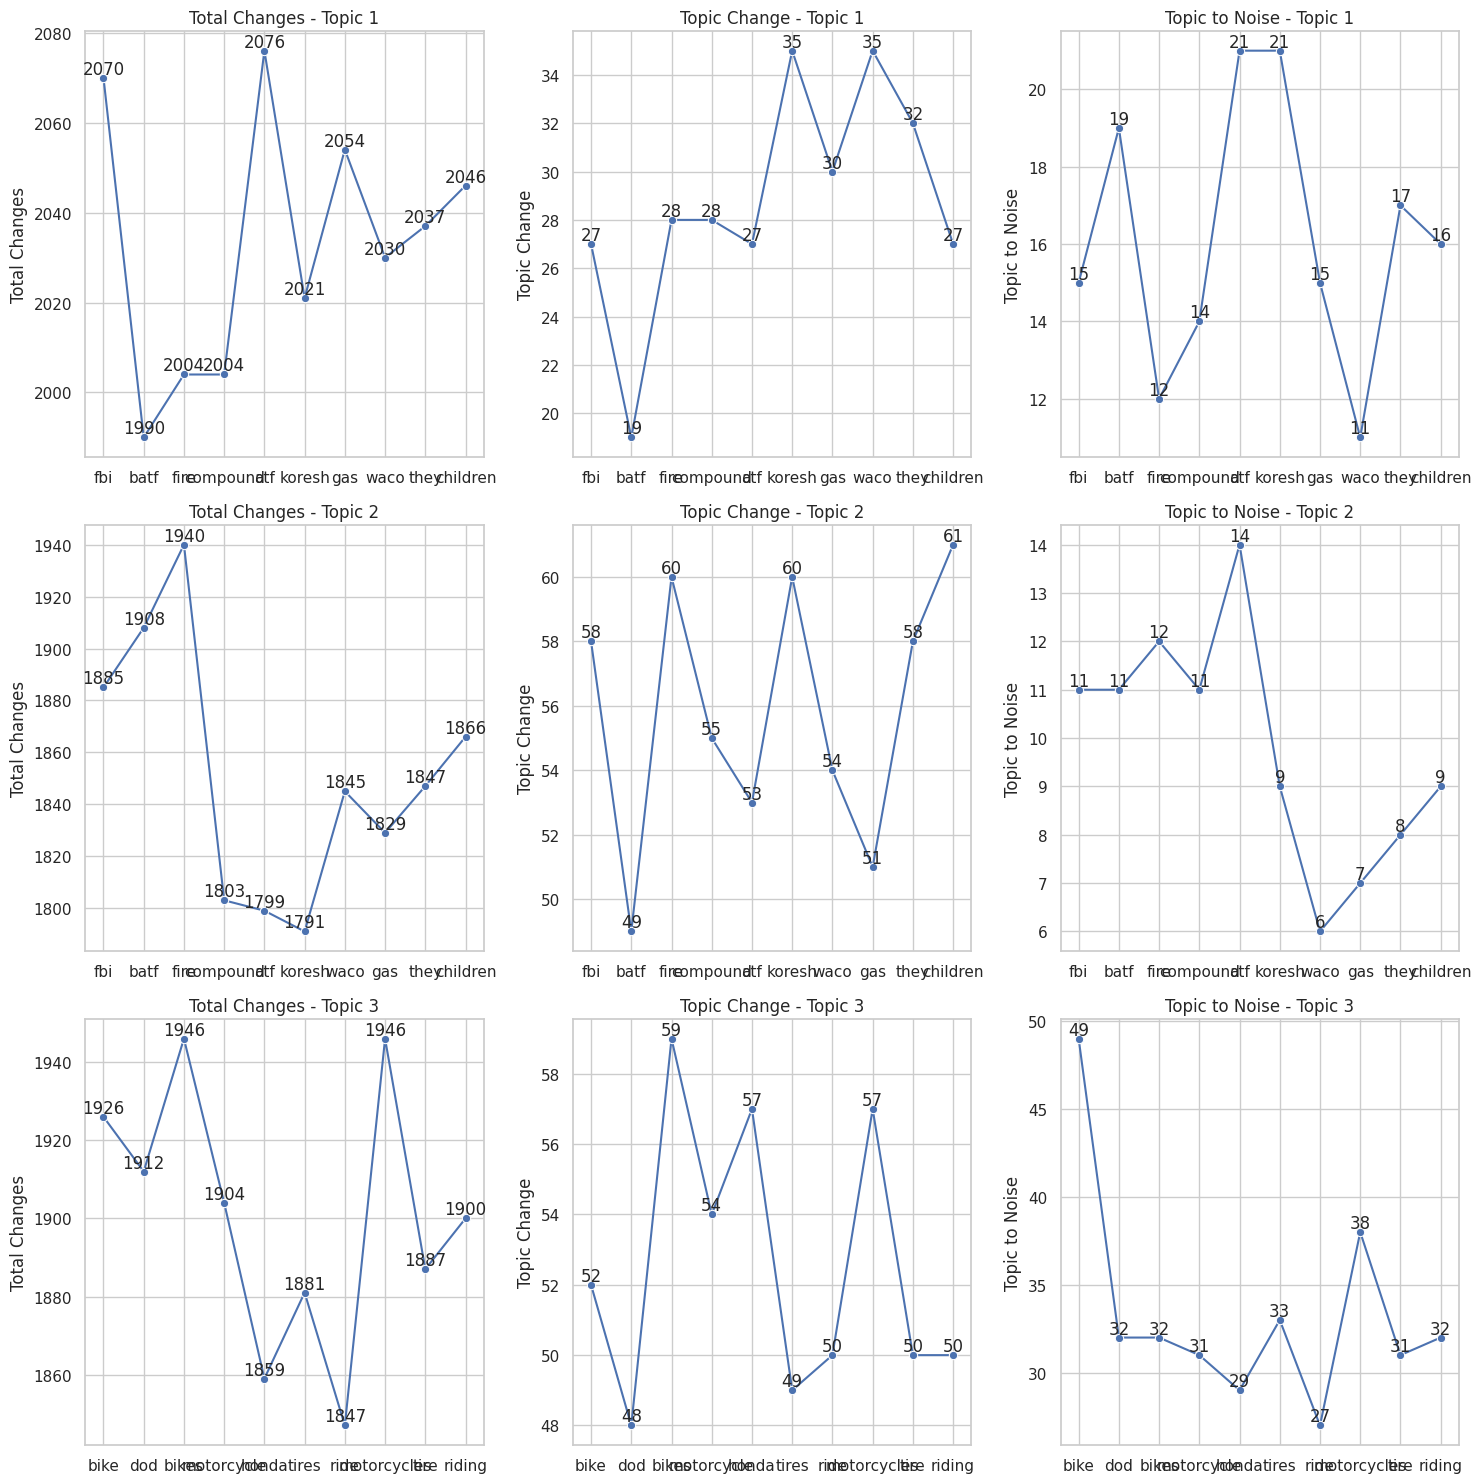

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_topic_statistics(data, topic_numbers):
    # Create subplots
    fig, axes = plt.subplots(len(topic_numbers), 3, figsize=(15, len(topic_numbers) * 5))

    for idx, topic_number in enumerate(topic_numbers):
        # Extract data for the specified topic
        topic_data = data[f"Topic_{topic_number}"]

        # Extract word-level statistics
        words = list(topic_data.keys())
        total_changes = [word_data['total_changes'] for word_data in topic_data.values()]
        topic_change = [word_data['topic_change'] for word_data in topic_data.values()]
        topic_to_noise = [word_data['topic_to_noise'] for word_data in topic_data.values()]

        # Plot total_changes for each word
        sns.lineplot(x=words, y=total_changes, marker='o', ax=axes[idx, 0])
        axes[idx, 0].set_title(f'Total Changes - Topic {topic_number}')
        axes[idx, 0].set_ylabel('Total Changes')
        for i, value in enumerate(total_changes):
            axes[idx, 0].text(i, value, str(value), ha='center', va='bottom')

        # Plot topic_change for each word
        sns.lineplot(x=words, y=topic_change, marker='o', ax=axes[idx, 1])
        axes[idx, 1].set_title(f'Topic Change - Topic {topic_number}')
        axes[idx, 1].set_ylabel('Topic Change')
        for i, value in enumerate(topic_change):
            axes[idx, 1].text(i, value, str(value), ha='center', va='bottom')

        # Plot topic_to_noise for each word
        sns.lineplot(x=words, y=topic_to_noise, marker='o', ax=axes[idx, 2])
        axes[idx, 2].set_title(f'Topic to Noise - Topic {topic_number}')
        axes[idx, 2].set_ylabel('Topic to Noise')
        for i, value in enumerate(topic_to_noise):
            axes[idx, 2].text(i, value, str(value), ha='center', va='bottom')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

# Example usage: plot statistics for Topic 1, Topic 2, and Topic 3
plot_topic_statistics(data, [1, 2, 3])


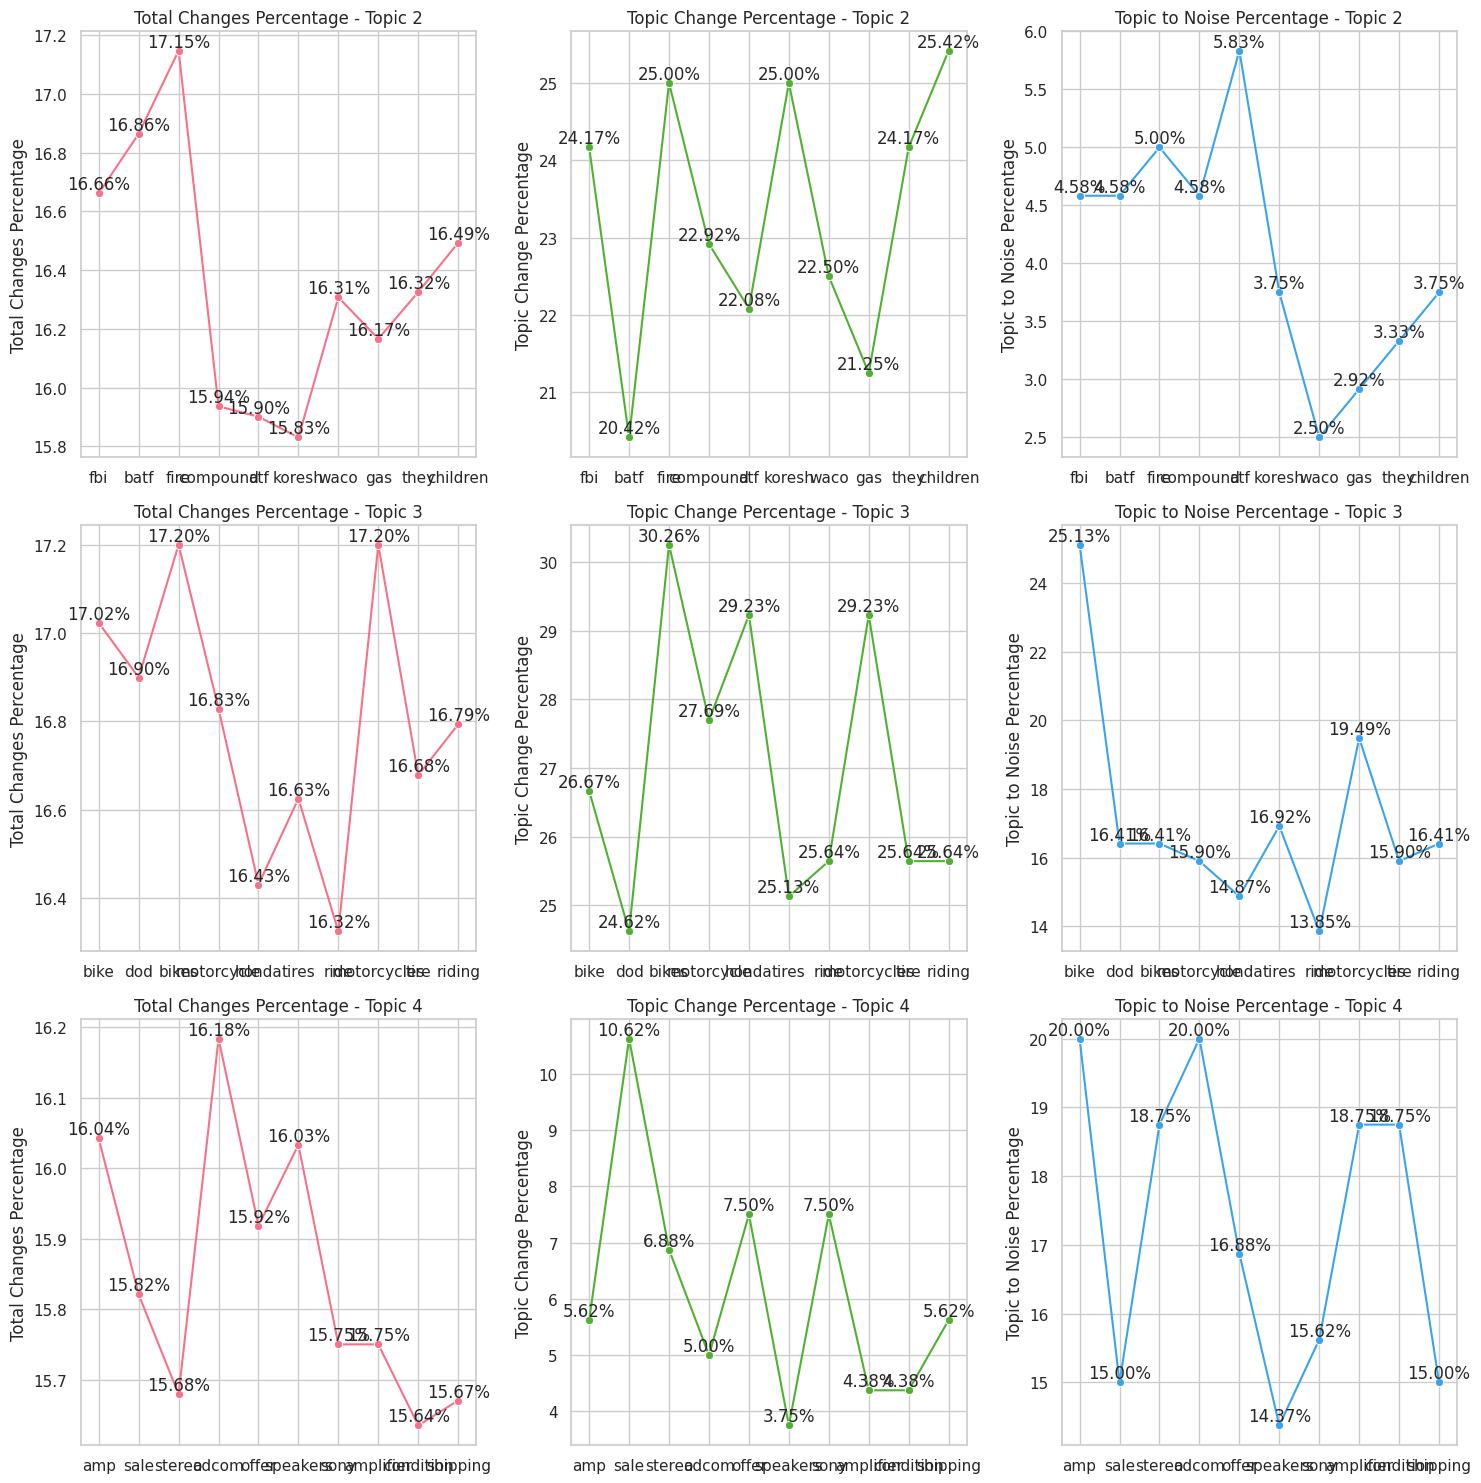

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

# Step 1: Load DataFrame from CSV
csv_file_path = "/home/abpal/WorkFiles/Results/Comprehensiveness_Raw_Non_Cumulative/Base_Results/base.csv"  # Replace with the actual path to your CSV file
df = pd.read_csv(csv_file_path)

# Step 2: Load a specific column into a list
column_name = "Count"  # Replace with the actual name of the column
column_list = df[column_name].tolist()

def plot_topic_statistics(data, topic_numbers,total_docs,total_topic_docs):
    # Create subplots
    fig, axes = plt.subplots(len(topic_numbers), 3, figsize=(15, len(topic_numbers) * 5))
    
    # Define distinct colors for each plot
    colors = sns.color_palette("husl", 3)

    total_topic_docs = {i - 1: value for i, value in enumerate(total_topic_docs)}

    for idx, topic_number in enumerate(topic_numbers):
        # Extract data for the specified topic
        topic_data = data[f"Topic_{topic_number}"]

        # Extract word-level statistics
        words = list(topic_data.keys())
        total_changes = [word_data['total_changes'] for word_data in topic_data.values()]
        topic_change = [word_data['topic_change'] for word_data in topic_data.values()]
        topic_to_noise = [word_data['topic_to_noise'] for word_data in topic_data.values()]

        # Calculate percentages
        total_changes_percentage = [value / total_docs * 100 for value in total_changes]
        topic_change_percentage = [value / total_topic_docs[topic_number] * 100 for value in topic_change]
        topic_to_noise_percentage = [value / total_topic_docs[topic_number] * 100 for value in topic_to_noise]

        # Plot total_changes_percentage for each word
        sns.lineplot(x=words, y=total_changes_percentage, color=colors[0],marker='o', ax=axes[idx, 0])
        axes[idx, 0].set_title(f'Total Changes Percentage - Topic {topic_number}')
        axes[idx, 0].set_ylabel('Total Changes Percentage')
        for i, value in enumerate(total_changes_percentage):
            axes[idx, 0].text(i, value, f"{value:.2f}%", ha='center', va='bottom')

        # Plot topic_change_percentage for each word
        sns.lineplot(x=words, y=topic_change_percentage, color=colors[1], marker='o', ax=axes[idx, 1])
        axes[idx, 1].set_title(f'Topic Change Percentage - Topic {topic_number}')
        axes[idx, 1].set_ylabel('Topic Change Percentage')
        for i, value in enumerate(topic_change_percentage):
            axes[idx, 1].text(i, value, f"{value:.2f}%", ha='center', va='bottom')

        # Plot topic_to_noise_percentage for each word
        sns.lineplot(x=words, y=topic_to_noise_percentage, color=colors[2],marker='o', ax=axes[idx, 2])
        axes[idx, 2].set_title(f'Topic to Noise Percentage - Topic {topic_number}')
        axes[idx, 2].set_ylabel('Topic to Noise Percentage')
        for i, value in enumerate(topic_to_noise_percentage):
            axes[idx, 2].text(i, value, f"{value:.2f}%", ha='center', va='bottom')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

# Example usage: plot percentages for Topic 1, Topic 2, and Topic 3
plot_topic_statistics(
    data = data, 
    topic_numbers = [2, 3, 4],
    total_docs = 11314 ,
    total_topic_docs = column_list,
)

In [10]:
import scipy.stats

# Example data
x = [0.1,0.2,0.3]
y = [3,2,1]

# Calculate Spearman's rank correlation coefficient
rho, p_value = scipy.stats.spearmanr(x, y)

# Print the result
print(f"Spearman's rank correlation coefficient: {rho}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Spearman's rank correlation coefficient: -1.0
P-value: 0.0
The correlation is statistically significant.


In [2]:
import json 

file_path = "/home/abpal/WorkFiles/Results/Comprehensiveness_Raw/Base_Results/c_tf_idf_mappings.json"

with open(file_path, 'r') as json_file:
    c_tf_idf = json.load(json_file)

print("Loaded dictionary:", c_tf_idf)

Loaded dictionary: {'0': [['he', 0.009474641588755986], ['year', 0.008657504378325704], ['baseball', 0.007997396017336447], ['team', 0.007300335111011363], ['game', 0.0071656135150624505], ['runs', 0.006998998129517365], ['braves', 0.0064129351896433685], ['pitching', 0.006345316095551827], ['games', 0.006010339686309366], ['his', 0.00587031879807012]], '1': [['clipper', 0.018117221776160188], ['key', 0.01741595046031002], ['chip', 0.015074231563983298], ['encryption', 0.014746945183719107], ['escrow', 0.012358608488517714], ['keys', 0.009894362927486364], ['government', 0.008655856765000922], ['nsa', 0.007942740888502225], ['crypto', 0.007932141313373258], ['secure', 0.007345398809604412]], '2': [['gun', 0.01883419130737341], ['guns', 0.011282757015100717], ['firearms', 0.009324752796628536], ['militia', 0.00904298778779388], ['weapons', 0.008155389653495743], ['amendment', 0.007418778840586171], ['control', 0.007340470604391931], ['crime', 0.006323538762171577], ['firearm', 0.0060427

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

def get_topic_change_statistics(data, topic_numbers,total_docs,total_topic_docs):

    total_topic_docs = {i - 1: value for i, value in enumerate(total_topic_docs)}
    results = {}
    for idx, topic_number in enumerate(topic_numbers):
        # Extract data for the specified topic
        topic_data = data[f"Topic_{topic_number}"]

        # Extract word-level statistics
        words = list(topic_data.keys())
        total_changes = [word_data['total_changes'] for word_data in topic_data.values()]
        topic_change = [word_data['topic_change'] for word_data in topic_data.values()]
        topic_to_noise = [word_data['topic_to_noise'] for word_data in topic_data.values()]

        # Calculate percentages
        total_changes_percentage = [value / total_docs * 100 for value in total_changes]
        topic_change_percentage = [value / total_topic_docs[topic_number] * 100 for value in topic_change]
        topic_to_noise_percentage = [value / total_topic_docs[topic_number] * 100 for value in topic_to_noise]

        topic_res = {
            "Topic_Change" : {},
            "Total_Change" : {},
            "Topic_to_Noise_Change" : {},
        }

        for idx,word in enumerate(words):
            topic_res['Topic_Change'][word] = topic_change_percentage[idx]
            topic_res['Total_Change'][word] = total_changes[idx]
            topic_res['Topic_to_Noise_Change'][word] = topic_to_noise[idx]
        
        results[topic_number] = topic_res    
    
    return results

# Example usage: plot percentages for Topic 1, Topic 2, and Topic 3
topic_change_stat = get_topic_change_statistics(
    data = data, 
    topic_numbers = range(100),
    total_docs = 11314 ,
    total_topic_docs = column_list,
)

In [11]:
correlations_ = []
p_values = []

for i in range(100):

    # get the actual ctfidf ranks
    numbers_for_key = [item[1] for item in c_tf_idf[str(i)]]
    # print(f'Numbers for key {i}: {numbers_for_key}')
    x = numbers_for_key

    # get the ranks based on percentage of topics changed per representative word
    y = list(topic_change_stat[i]["Topic_Change"].values())

    rho, p_value = scipy.stats.spearmanr(x, y)
    correlations_.append(rho)
    p_values.append(p_value)

In [62]:
p_values

[0.5384276585293759,
 0.14680023465709427,
 0.4970775764810612,
 0.734780145679172,
 0.22440418931413877,
 0.2914682712989585,
 0.8810361811618526,
 0.17128139641927426,
 0.9466770792643007,
 0.020521411876850356,
 0.9065131248935338,
 0.10848838960316552,
 0.2027505555110427,
 0.47649345335133597,
 0.2850413039427343,
 0.38178736979537065,
 0.9466770792643007,
 0.6494602227242312,
 0.28987658207732536,
 0.7514196523258483,
 0.6741752533023246,
 0.21139056132554077,
 0.2930500752928223,
 0.6250493381834632,
 0.9866618333383285,
 0.12102739408380091,
 0.38704903568768656,
 0.2830033650057079,
 0.3654683104386702,
 0.8667017501236011,
 0.8009843299145075,
 0.9729080099355807,
 0.9329568385993042,
 0.9329568385993042,
 0.9867025576451145,
 0.8021812915092663,
 0.019487427582625564,
 0.7756636846367881,
 0.58904630489656,
 0.33708771062507387,
 0.4463726045028741,
 0.20584999674311066,
 0.13150199306594584,
 0.23794186616753052,
 0.4294929705980839,
 0.3096359885044435,
 0.0550364597528199

In [13]:
correlations_

[0.22156468376279892,
 -0.4939118577177574,
 -0.2439069733276417,
 0.12309149097933272,
 0.4220361099651049,
 -0.3708223816448394,
 0.05454545454545454,
 -0.46921626483186957,
 -0.024390697332764166,
 0.7134278969833519,
 0.042815257532691796,
 0.538248951839554,
 0.4403855060505442,
 -0.2553203283456271,
 0.3754290474869648,
 0.31098139099274313,
 -0.024390697332764166,
 -0.16463720699615814,
 -0.3719581343246535,
 0.11515151515151514,
 -0.15244185832977605,
 -0.43293487765656397,
 0.3696969696969697,
 0.1768325556625402,
 -0.006097674333191042,
 0.5227987675648555,
 -0.3077287274483318,
 0.37690143708164003,
 -0.32121212121212117,
 -0.06116465361813115,
 -0.0917469804271967,
 -0.012386810115016291,
 -0.030677155956992445,
 0.030677155956992445,
 0.006079055436800646,
 0.09118583155200968,
 -0.7174921664468928,
 -0.10366046366424772,
 0.19512557866211333,
 -0.33956440218095824,
 -0.2724193860473977,
 -0.43769199144964654,
 -0.5106406566912542,
 -0.41107388982369863,
 -0.28222983480433

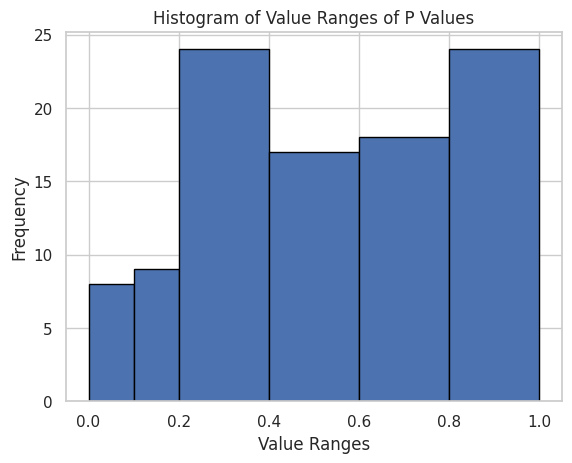

In [67]:
import matplotlib.pyplot as plt

# Replace this list with your actual list of numbers
numbers = p_values

# Define the bins/ranges
bins = [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]

# Create a histogram
plt.hist(numbers, bins=bins, edgecolor='black')

# Set labels and title
plt.xlabel('Value Ranges')
plt.ylabel('Frequency')
plt.title('Histogram of Value Ranges of P Values')

# Show the plot
plt.show()


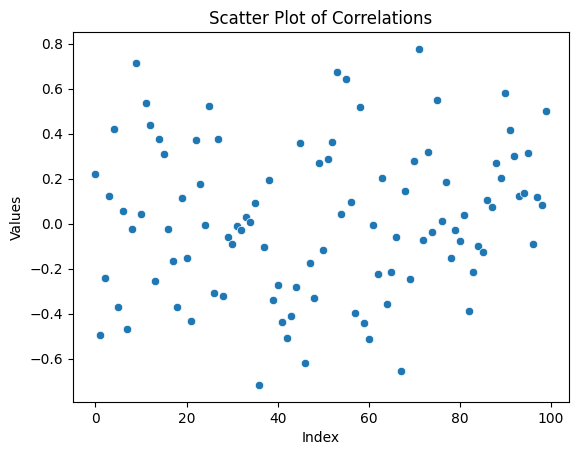

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your list of values
values = correlations_

# Generate x values (assuming each value corresponds to a point on the x-axis)
x_values = range(len(values))

# Create a DataFrame for Seaborn
data = {'Index': x_values, 'Values': values}
df = pd.DataFrame(data)

# Create scatter plot using Seaborn
sns.scatterplot(x='Index', y='Values', data=df)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot of Correlations')

# Show the plot
plt.show()


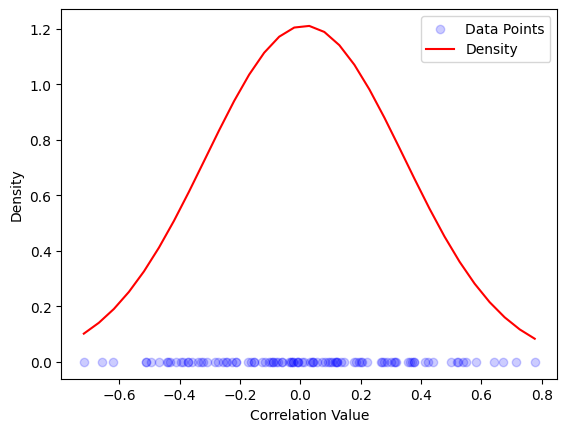

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate some random data (replace this with your list of numbers)
data = correlations_

# Create a histogram to estimate the density
hist, bins = np.histogram(data, bins=30, density=True)

# Calculate the PDF (Probability Density Function) using a normal distribution
pdf_vals = norm.pdf(bins, np.mean(data), np.std(data))

# Create a scatter plot of the values
plt.scatter(data, np.zeros_like(data), alpha=0.2, color='blue', label='Data Points')

# Plot the estimated density as a line
plt.plot(bins, pdf_vals, color='red', label='Density')

# Display the plot
plt.legend()
plt.xlabel("Correlation Value")
plt.ylabel("Density")
plt.show()


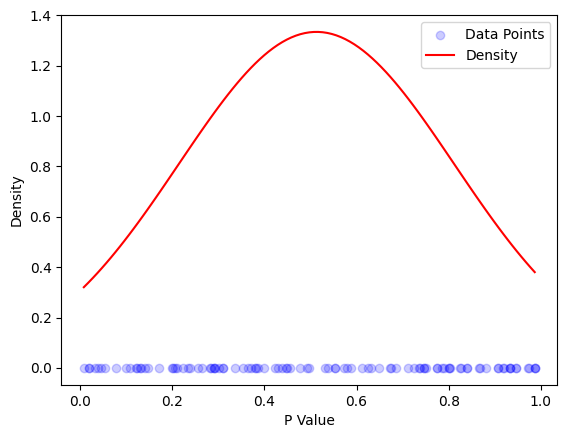

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate some random data (replace this with your list of numbers)
data = p_values

# Create a histogram to estimate the density
hist, bins = np.histogram(data, bins=100, density=True)

# Calculate the PDF (Probability Density Function) using a normal distribution
pdf_vals = norm.pdf(bins, np.mean(data), np.std(data))

# Create a scatter plot of the values
plt.scatter(data, np.zeros_like(data), alpha=0.2, color='blue', label='Data Points')

# Plot the estimated density as a line
plt.plot(bins, pdf_vals, color='red', label='Density')

# Display the plot
plt.legend()
plt.xlabel("P Value")
plt.ylabel("Density")
plt.show()


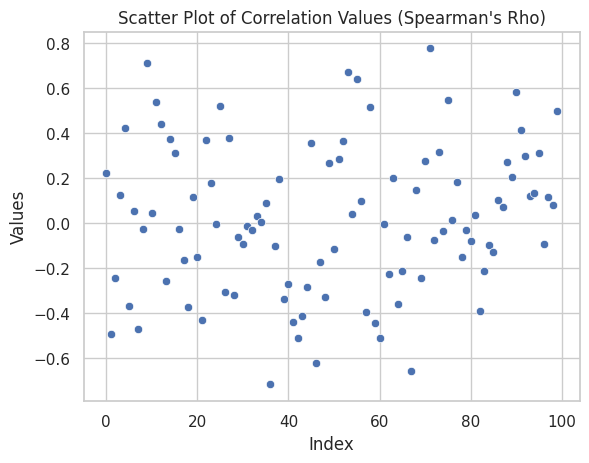

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your list of values
values = correlations_

# Generate x values (assuming each value corresponds to a point on the x-axis)
x_values = range(len(values))

# Create a DataFrame for Seaborn
data = {'Index': x_values, 'Values': values}
df = pd.DataFrame(data)

# Create scatter plot using Seaborn
sns.scatterplot(x='Index', y='Values', data=df)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot of Correlation Values (Spearman\'s Rho)')

# Show the plot
plt.show()


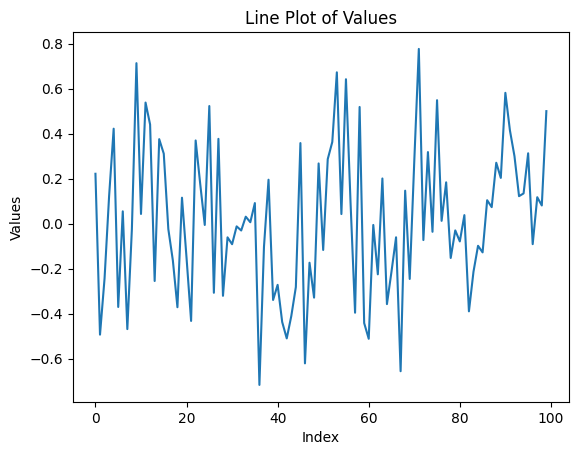

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your list of values
values = [0.009474641588755986, 0.008657504378325704, 0.007997396017336447, 0.004567890123, 0.005678901234, 0.006789012345]

# Generate x values (assuming each value corresponds to a point on the x-axis)
x_values = range(len(values))

# Create a DataFrame for Seaborn
data = {'Index': x_values, 'Values': values}
df = pd.DataFrame(data)

# Create line plot using Seaborn
sns.lineplot(x='Index', y='Values', data=df)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Plot of Values')

# Show the plot
plt.show()


## Plot of Cumulative Results 

In [49]:
f = open('/home/abpal/WorkFiles/Results/Comprehensiveness_Raw_Cumulative/Stats/results.json')
data_cumulative = json.load(f)
data_cumulative.keys()

dict_keys(['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7', 'Topic_8', 'Topic_9', 'Topic_10', 'Topic_11', 'Topic_12', 'Topic_13', 'Topic_14', 'Topic_15', 'Topic_16', 'Topic_17', 'Topic_18', 'Topic_19'])

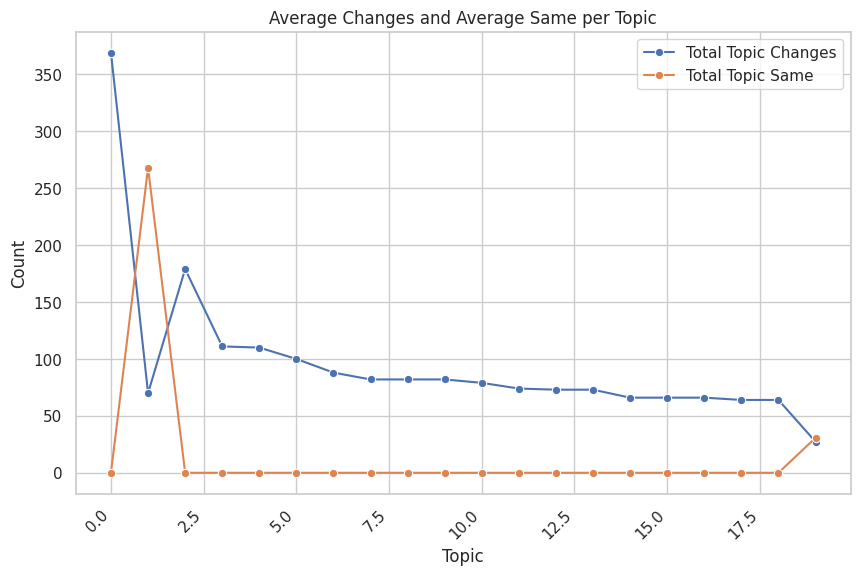

In [50]:
# Assuming your data is stored in a variable called 'your_data'
plot_topic_statistics(data_cumulative)

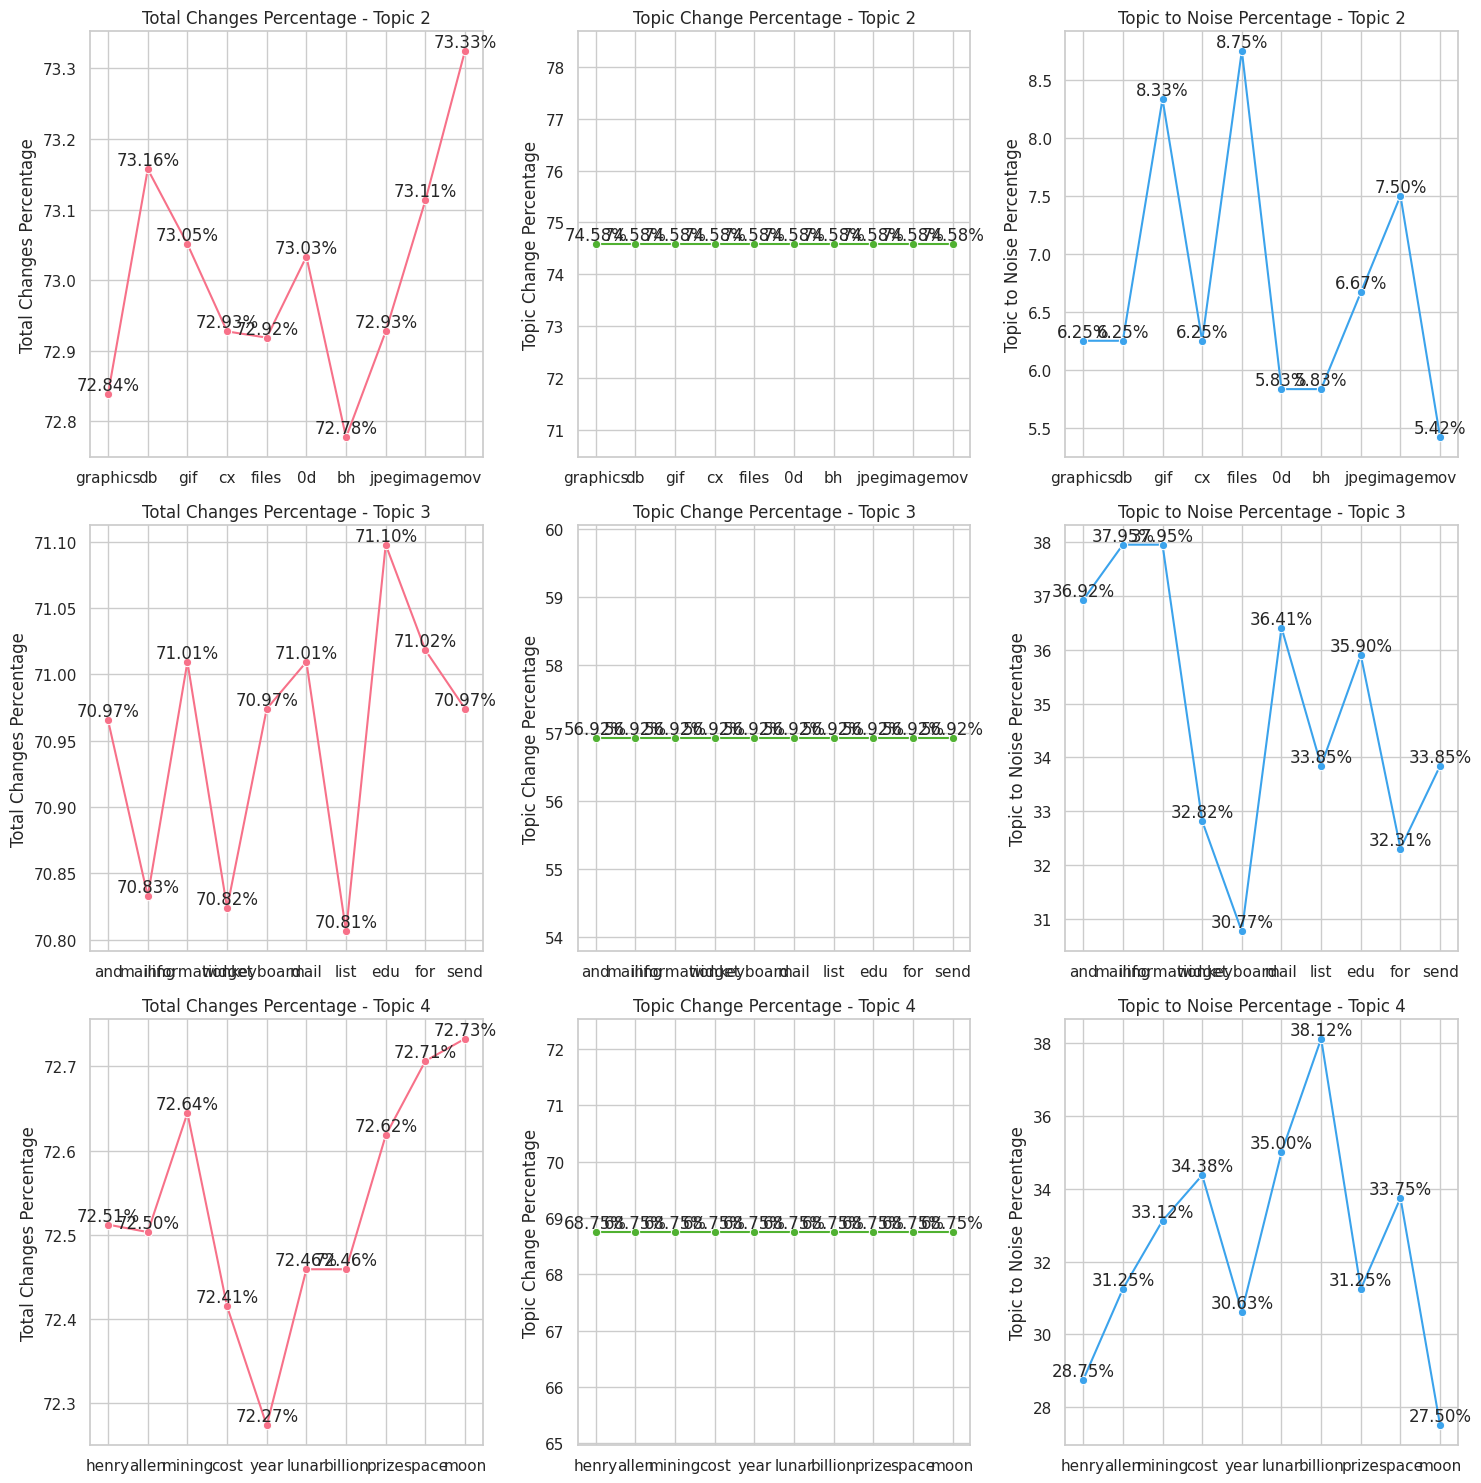

In [58]:
# Example usage: plot percentages for Topic 1, Topic 2, and Topic 3
plot_topic_statistics(
    data = data_cumulative, 
    topic_numbers = [2, 3, 4],
    total_docs = 11314 ,
    total_topic_docs = column_list,
)

# Sufficiency

In [ ]:
f = open('/home/abpal/WorkFiles/Results/sufficiency.json')
data = json.load(f)

def plot_topic_statistics(data):
    # Extract data for plotting
    topics = list(int(i.split("_")[-1]) for i in data.keys())
    total_changes_values = [sum(word_data['total_changes'] for word_data in words.values()) for words in data.values()]
    total_same_values = [sum(word_data['total_same'] for word_data in words.values()) for words in data.values()]

    # Create a DataFrame for Seaborn
    import pandas as pd
    df = pd.DataFrame({'Topic': topics, 'Total Changes': total_changes_values, 'Total Same': total_same_values})

    # Set the plotting style
    sns.set(style="whitegrid")

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the total changes
    sns.lineplot(x='Topic', y='Total Changes', data=df, marker='o', label='Total Changes', ax=ax)

    # Plot the total same
    sns.lineplot(x='Topic', y='Total Same', data=df, marker='o', label='Total Same', ax=ax)

    # Set plot labels and title
    ax.set(xlabel='Topic', ylabel='Count', title='Total Changes and Total Same per Topic')

    # Display the legend
    ax.legend()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

# Assuming your data is stored in a variable called 'your_data'
plot_topic_statistics(data)


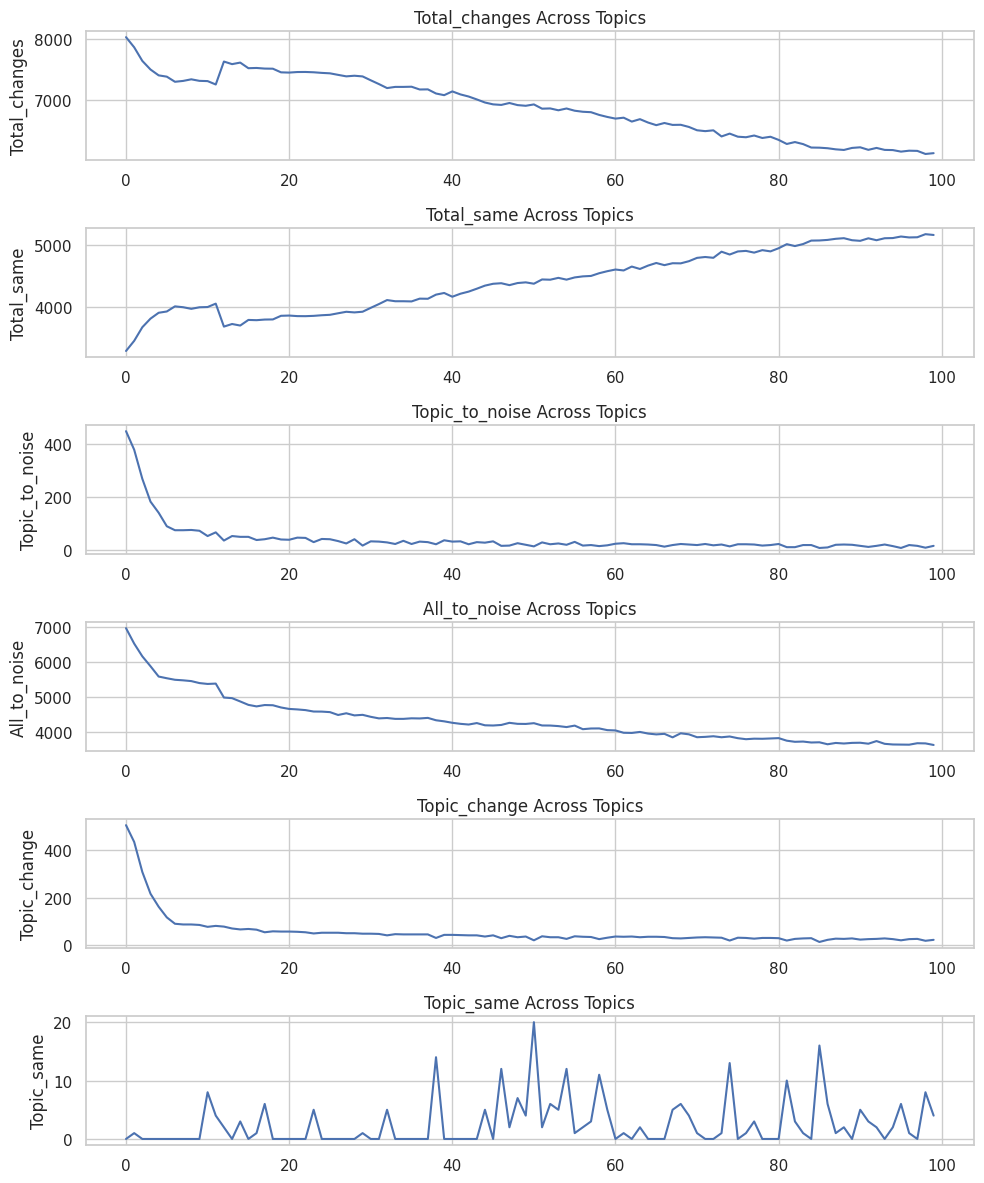

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_topic_statistics(data):
    # Extract topics
    topics = list(data.keys())
    
    topics_nums = list(int(i.split("_")[-1]) for i in data.keys())

    # Create subplots
    fig, axes = plt.subplots(len(data[topics[0]]), 1, figsize=(10, 12))

    for i, metric in enumerate(data[topics[0]].keys()):
        # Extract values for the current metric across all topics
        values = [topic_data[metric] for topic_data in data.values()]

        # Plot the values for the current metric
        sns.lineplot(x=topics_nums, y=values, ax=axes[i])
        axes[i].set_title(f'{metric.capitalize()} Across Topics')
        axes[i].set_ylabel(metric.capitalize())

        # # Display values on the plot
        # for j, value in enumerate(values):
        #     axes[i].text(j, value, str(value), ha='center', va='bottom')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()


plot_topic_statistics(data)
